## Read the model and my data and predict

In [52]:
from __future__ import absolute_import, division, print_function

# Tensorflow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

from PIL import Image
import PIL

import h5py

print("tf ver:\t\t", tf.__version__)
print("keras ver:\t", keras.__version__)
print("np ver:\t\t", np.__version__)
print("pil ver:\t", PIL.__version__)

tf ver:		 2.7.0
keras ver:	 2.7.0
np ver:		 1.17.4
pil ver:	 7.0.0


In [53]:
mydata = np.load('mynumber.npz')

In [54]:
type(mydata)

numpy.lib.npyio.NpzFile

In [55]:
mydata.files

['images', 'labels']

In [56]:
mydata['images'].shape

(10, 28, 28)

In [57]:
mydata['labels'].shape

(10,)

## Load my AI model

In [58]:
model = keras.models.load_model('HandWriting_model.h5')

In [59]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 16)                2064      
                                                                 
 dense_2 (Dense)             (None, 10)                170       
                                                                 
Total params: 102,714
Trainable params: 102,714
Non-trainable params: 0
_________________________________________________________________
None


## Normalize the data

In [60]:
images = mydata['images']/255

## Make predictions

In [61]:
all_predictions = model.predict(images)

In [62]:
all_predictions[0]

array([  2.027833 ,  11.763771 ,  17.422781 ,   9.528018 , -12.584474 ,
         8.5164795,   8.832851 ,  -7.4587913,  12.714036 , -13.612302 ],
      dtype=float32)

## Graph the predictions and images

In [63]:
def plot_classified_image(ax, img, label, classification):
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(img, cmap=plt.cm.binary)
    predicted = np.argmax(classification)
    if predicted == label:
        color = 'black'
    else:
        color = 'r'

    plt.xlabel("Predicted : {}  Confidence : {:2.0f}  Actual : {}".format(predicted, np.max(classification), label), color=color)
    # plt.xlabel("[zzzzz]")
    return ax

In [64]:
# may need to fix this when we have labels for the category names
def plot_prediction(ax, label, prediction):
    number_of_classes = len(prediction)
    x_values = np.arange(number_of_classes)
    predicted = np.argmax(prediction)
    ax.bar(x_values,prediction, alpha=0.75)
    ax.bar(predicted, prediction[predicted], color='r', label='prediction')
    ax.bar(label,prediction[label], color='g', label='actual')
    ax.set_xticks(x_values)
    ax.set_xlabel('Number')
    ax.set_ylabel('Porbability')
    ax.legend()

In [65]:
def graph_predictions(images, labels, predictions, rows=1, cols=1, start=0, zoom=2):
    n_plots = rows * cols * 2
    fig, ax = plt.subplots(rows,cols * 2,figsize=(cols * 2 * zoom, rows * zoom))
    plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)
    for n in range(n_plots):
        #plt.subplot(rows, cols * 2, n+1)
        img_index = (n // 2) + start
        if((n%2)==0):
            plot_classified_image(plt.subplot(rows, cols * 2, n+1), images[img_index], labels[img_index], predictions[img_index])
        else:
            plot_prediction(plt.subplot(rows, cols * 2, n+1), labels[img_index], predictions[img_index])
    plt.show()

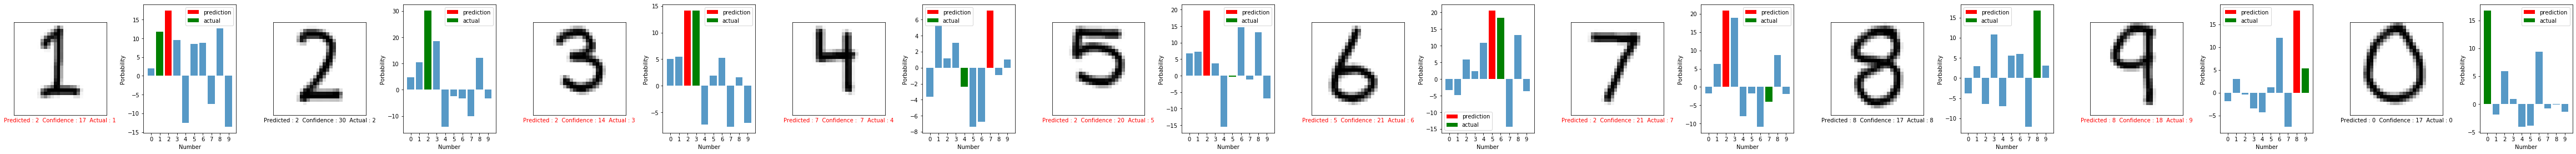

In [68]:
graph_predictions(images, mydata['labels'], all_predictions, start=0, rows=1, cols=10, zoom=4)